Notebook prepared by Henrique Lopes Cardoso (hlc@fe.up.pt).

# TEXT CLASSIFICATION


## Original dataset

For text classification, let's make use of a dataset of restaurant reviews, which can be used for a simple sentiment analysis task: each review is either positive (1) or negative (0).


In [51]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("../data/restaurant_reviews.tsv", delimiter="\t", quoting=3)

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


We can start by observing label distribution:


1    500
0    500
Name: Liked, dtype: int64
1    0.5
0    0.5
Name: Liked, dtype: float64


<AxesSubplot: >

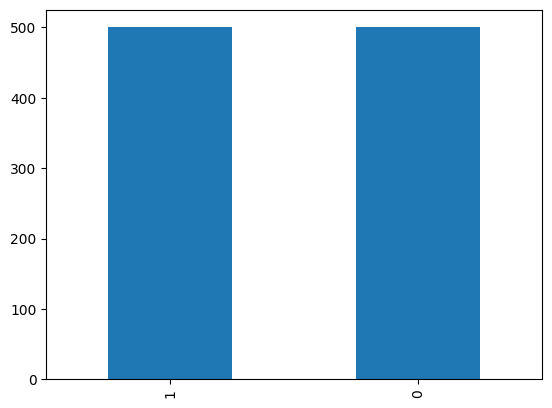

In [52]:
print(dataset["Liked"].value_counts())

print(dataset["Liked"].value_counts(normalize=True))

dataset["Liked"].value_counts().plot(kind="bar")

## Cleanup and normalization

A typical first step when addressing text classification is to apply a few techniques to cleanup and normalize the text.

We can start by quickly inspecting the contents of reviews. Print them all and try finding opportunities for cleanup and normalization operations.


In [53]:
# your code here
with pd.option_context(
    "display.max_rows",
    None,
):
    print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
5       Now I am getting angry and I want my damn pho.      0
6                Honeslty it didn't taste THAT fresh.)      0
7    The potatoes were like rubber and you could te...      0
8                            The fries were great too.      1
9                                       A great touch.      1
10                            Service was very prompt.      1
11                                  Would not go back.      0
12   The cashier had no care what so ever on what I...      0
13   I tried the Cape Cod ravoli, chicken, with cra...      1
14   I was disgusted because I was pretty sure that...      0
15   I w

So, you've probably been able to find non-alphabetic characters (including punctuation), capitalized words (sometimes even whole reviews), and so on.

#### Removing non-alphabetic chars

Let's start by removing any non-alpha chars, using a regular expression. We'll create a separate corpus (a list of reviews), so that we leave the original dataset untouched.


In [54]:
import re

corpus = []
for i in range(0, dataset["Review"].size):
    # get review and remove non alpha chars
    review = re.sub("[^a-zA-Z]", " ", dataset["Review"][i])
    # add review to corpus
    corpus.append(review)

print(corpus)

['Wow    Loved this place ', 'Crust is not good ', 'Not tasty and the texture was just nasty ', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it ', 'The selection on the menu was great and so were the prices ', 'Now I am getting angry and I want my damn pho ', 'Honeslty it didn t taste THAT fresh  ', 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ', 'The fries were great too ', 'A great touch ', 'Service was very prompt ', 'Would not go back ', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced ', 'I tried the Cape Cod ravoli  chicken  with cranberry   mmmm ', 'I was disgusted because I was pretty sure that was human hair ', 'I was shocked because no signs indicate cash only ', 'Highly recommended ', 'Waitress was a little slow in service ', 'This place is not worth your time  let alone Vegas ', 'did not like at all ', 'The Burrittos B

#### Lowercasing

We can then apply lowercasing, so that words such as _Amazing_, _AMAZING_ and _amazing_ all have the same representation.


In [55]:
# your code here
aux_corpus = []
for review in corpus:
    # get review, trim white spaces from both ends and lower it
    review = review.strip().lower()

    # add review to corpus
    aux_corpus.append(review)

corpus = aux_corpus

print(corpus)

['wow    loved this place', 'crust is not good', 'not tasty and the texture was just nasty', 'stopped by during the late may bank holiday off rick steve recommendation and loved it', 'the selection on the menu was great and so were the prices', 'now i am getting angry and i want my damn pho', 'honeslty it didn t taste that fresh', 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer', 'the fries were great too', 'a great touch', 'service was very prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced', 'i tried the cape cod ravoli  chicken  with cranberry   mmmm', 'i was disgusted because i was pretty sure that was human hair', 'i was shocked because no signs indicate cash only', 'highly recommended', 'waitress was a little slow in service', 'this place is not worth your time  let alone vegas', 'did not like at all', 'the burrittos blah', 'the food  amaz

#### Removing stop words

Another common step which is sometimes applied is to remove any stop words (words that do not have domain semantics attached). We can use the stop words list provided in NLTK for English:


In [56]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/margarida/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using this stop word list (which does include words that perhaps we should _not_ remove, such as negation terms), we can considerably reduce the size of our corpus.


In [57]:
# your code here
prev_corpus_size = len(set([word for review in corpus for word in review.split()]))

aux_corpus = []
for review in corpus:
    # get review, split it into words, remove stop words and join remaining words back into a string
    review = " ".join(
        [word for word in review.split() if word not in stopwords.words("english")]
    )

    # add review to corpus
    aux_corpus.append(review)

corpus = aux_corpus

print(corpus)

['wow loved place', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great prices', 'getting angry want damn pho', 'honeslty taste fresh', 'potatoes like rubber could tell made ahead time kept warmer', 'fries great', 'great touch', 'service prompt', 'would go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked signs indicate cash', 'highly recommended', 'waitress little slow service', 'place worth time let alone vegas', 'like', 'burrittos blah', 'food amazing', 'service also cute', 'could care less interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street tacos friendly staff', 'took hour get food tables restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combos like burger fries beer decen

This technique does not always enable machine learning classifiers to do better, as most of them are quite immune to the presence of stop words (which anyway tend not to be discriminative of the classes at hand). But in any case, removing stop words does reduce the size of the corpus.

Can you check how smaller the corpus has become by removing stop words? (You might need to go back and get the size of the corpus _before_ removing stop words, for comparison.)


In [58]:
# your code here
curr_corpus_size = len(set([word for review in corpus for word in review.split()]))

print(
    f"Previous corpus size: {prev_corpus_size} | Current corpus size: {curr_corpus_size}"
)

Previous corpus size: 2022 | Current corpus size: 1890


#### Stemming

Finally, we can apply stemming to further reduce the size of the vocabulary through normalization.


In [59]:
# your code here
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

prev_corpus_size = curr_corpus_size

aux_corpus = []
for review in corpus:
    # get review, split it into words, stem each word and join remaining words back into a string
    review = " ".join([ps.stem(word) for word in review.split()])

    # add review to corpus
    aux_corpus.append(review)

corpus = aux_corpus

print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

Can you check how much has the vocabulary been reduced by applying stemming? (You might need to go back one step and get the size of the vocabulary _before_ applying stemming, for comparison.)


In [60]:
# your code here
curr_corpus_size = len(set([word for review in corpus for word in review.split()]))

print(
    f"Previous corpus size: {prev_corpus_size} | Current corpus size: {curr_corpus_size}"
)

Previous corpus size: 1890 | Current corpus size: 1565


#### Doing it all in one step

Of course, instead of applying each of the aforementioned steps one at a time, it would be much more efficient to do it in a single loop. Here's the compact version for employing non-alphabetic filtering, lowercasing, stop word removal, and stemming.


In [61]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
sw = set(stopwords.words("english"))

corpus = []
for i in range(0, dataset["Review"].size):
    # get review and remove non alpha chars
    review = re.sub("[^a-zA-Z]", " ", dataset["Review"][i])

    # to lower-case
    review = review.lower()

    # split into tokens, apply stemming and remove stop words
    review = " ".join([ps.stem(w) for w in review.split() if w not in sw])

    corpus.append(review)

print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

#### Wordclouds

A visually appealing way of observing words in a corpus is by showing wordclouds. In order to make a single wordcloud for the whole corpus, we can join all reviews together. We then pass it to [WordCloud](https://amueller.github.io/word_cloud/) to generate a wordcloud: it will automatically assign weights to words based on the number of occurrences of each word.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(corpus))

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It would also be interesting to visualize a wordcloud for each of the classes. Can you do it?


In [ ]:
# your code here

## Generating a data set

We need to transform the data in the reduced-vocabulary corpus into a dataset that can be handled by machine learning models. Each review in our corpus is still rather unstructured: it is simply a lists of tokens. We will transform each review into a representation that makes use of the same set of features for the whole dataset.


#### Obtaining features from the Bag-of-Words model

The simplest way to do it is to create a _bag-of-words_ model, which ignores word sequence.

We can use scikit-learn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which converts a collection of text documents to a matrix of token counts.


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(1000, 1565)


By using CountVectorizer, we can limit the number of features by using the _max_features_ parameter.

Let's look at the features we've got:


In [63]:
print(vectorizer.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

/home/margarida/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Each review is now represented as a vector with the number of occurrences for each of the features, indicating how many times the corresponding token appears in the review. Each vector is very sparse.

Compare the contents of the 124th review with its representation vector following the bag-of-words model.


In [64]:
# your code here
features = vectorizer.get_feature_names_out()

review = corpus[123]
review_bag_of_words_rep = X[123]

dict_freqs = dict(zip(features, review_bag_of_words_rep))
clean_freqs = {k: v for k, v in dict_freqs.items() if v > 0}

print(f"Review: {review}\nBoW representation: {clean_freqs}")

Review: guy steak steak love son steak best worst place said best steak ever eaten
BoW representation: {'best': 2, 'eaten': 1, 'ever': 1, 'guy': 1, 'love': 1, 'place': 1, 'said': 1, 'son': 1, 'steak': 4, 'worst': 1}


#### Obtaining the classes

We can get the target labels from the second column in our original dataset, after which we have the full table of data on which we can train machine learning algorithms that are able to classify restaurant reviews into either positive or negative.


In [65]:
y = dataset["Liked"]

print(X.shape, y.shape)

(1000, 1565) (1000,)


## Training classifiers

To train machine learning classifiers, we first split the data into training and test sets.


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(f"\nLabel distribution in the training set:\n{y_train.value_counts()}")
print(f"\nLabel distribution in the test set:\n{y_test.value_counts()}")

(800, 1565) (800,)
(200, 1565) (200,)

Label distribution in the training set:
1    407
0    393
Name: Liked, dtype: int64

Label distribution in the test set:
0    107
1     93
Name: Liked, dtype: int64


Every time you perform the train-test split, you get slightly different results in terms of class distribution. To avoid it, you can use the _random_state_ parameter for _train_test_split_ (e.g. _random_state = 0_), which ensures you always get the same exact split.

You can also force a stratified split via parameter _stratify_, which ensures the same label distribution for both the training and test sets (_stratify=y_).


#### Naive Bayes

We can start by trying out fitting a [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) classifier to our training data. For text data, the two most effective variants are [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html).


In [67]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

Let's see the model's output on the test set:


In [68]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1]


We can assess the performance of the model by looking at different metrics.

We can print the _confusion matrix_, and get scores for _accuracy_, _precision_, _recall_, and _f1_. Since our dataset is perfectly balanced, accuracy will be a fairly good indicator of performance.


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# confusion matrix
print(confusion_matrix(y_test, y_pred))

# accuracy, precision, recall, f1
# your code here
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

[[72 35]
 [22 71]]
Accuracy: 0.715
Precision: 0.6698113207547169
Recall: 0.7634408602150538
F1: 0.7135678391959798


Let's do a test on a review obtained from the user. We ask the user for input, preprocess the inserted review by removing non-alphabetic characters and by applying lowercasing and stemming.

We then vectorize the review using the same vectorizer we've used before for creating the dataset. Note that we do not need to remove stop words, as these will be ignored by the vectorizer, since they do not show up in the feature set used to represent reviews.


In [70]:
import os

rev = input("Enter review: ")

# remove non alpha chars, apply lowercasing
# your code here
rev = re.sub("[^a-zA-Z]", " ", rev).lower()

# split into tokens and apply stemming
# your code here
rev = " ".join([ps.stem(w) for w in rev.split()])

# vectorize the review
V = vectorizer.transform([rev]).toarray()

print(rev)
print(V.shape)
print(V)

if clf.predict(V) == [1]:
    print("positive review (+)")
else:
    print("negative review (-)")

i did not think it wa bad at all i wa actual surpris with the high qualiti
(1, 1565)
[[0 0 0 ... 0 0 0]]
negative review (-)


Many classifiers also provide probabilities for each possible class when making predictions. We can get them by using _predict_proba_ instead of _predict_:


In [71]:
print(clf.predict(V))
print(clf.predict_proba(V))

[0]
[[0.97747459 0.02252541]]


#### Other classifiers

Try out using other classifiers, such as:

- _Logistic Regression_, through scikit-learn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.
- _Decision Tree_, through scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class. This model always assigns a probability of 1 to one of the classes.
- _Random Forest_, through scikit-learn's [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class.
- _Support Vector Machines (SVM)_, through scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class. The SVM model also allows you to get probabilities, but for that you need to use the _probability=True_ parameter setting in its constructor.
- _Perceptron_, through scikit-learn's [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) class. This model does not allow you to get probabilities.
- _eXtreme Gradient Boosting_, through [XGBoost](https://xgboost.readthedocs.io/en/stable/).


In [72]:
# your code here
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    SGDClassifier(),
    Perceptron(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    print(f"{classifier.__class__.__name__}\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1: {f1_score(y_test, y_pred)}")
    print("_____________________________________\n")

LogisticRegression

Accuracy: 0.765
Precision: 0.75
Recall: 0.7419354838709677
F1: 0.7459459459459459
_____________________________________

SGDClassifier

Accuracy: 0.725
Precision: 0.7209302325581395
Recall: 0.6666666666666666
F1: 0.6927374301675978
_____________________________________

Perceptron

Accuracy: 0.74
Precision: 0.7469879518072289
Recall: 0.6666666666666666
F1: 0.7045454545454546
_____________________________________

DecisionTreeClassifier

Accuracy: 0.66
Precision: 0.6288659793814433
Recall: 0.6559139784946236
F1: 0.6421052631578947
_____________________________________

RandomForestClassifier

Accuracy: 0.73
Precision: 0.7671232876712328
Recall: 0.6021505376344086
F1: 0.674698795180723
_____________________________________

XGBClassifier

Accuracy: 0.735
Precision: 0.7439024390243902
Recall: 0.6559139784946236
F1: 0.6971428571428571
_____________________________________



#### Cross-validation

When addressing datasets that are not big enough, cross-validation allows us to use the whole dataset for both training and testing, by splitting the data into _k_ folds. By training the model _k_ times, each time using _k-1_ folds and testing in the remaining fold, we can get performance scores for the model that are averaged accross the _k_ iterations.


In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = SVC()
scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print(
    "%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())
)

[0.68 0.74 0.74 0.81 0.74 0.83 0.84 0.82 0.77 0.84]
0.78 accuracy with a standard deviation of 0.05


The [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) class allows greated flexibility in terms of the metrics we can get, and also provides train scores, fit times and score times.


In [74]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    clf,
    X,
    y,
    scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
    return_train_score=True,
)
scores

{'fit_time': array([0.41331196, 0.39965034, 0.85615754, 0.37436748, 0.36054778]),
 'score_time': array([0.15043569, 0.15555501, 0.15696836, 0.14349651, 0.15385389]),
 'test_accuracy': array([0.73 , 0.775, 0.745, 0.825, 0.775]),
 'train_accuracy': array([0.9675 , 0.9575 , 0.9675 , 0.96125, 0.965  ]),
 'test_precision_macro': array([0.73770153, 0.79662388, 0.76749645, 0.82898067, 0.78318402]),
 'train_precision_macro': array([0.9682492 , 0.95823317, 0.96779237, 0.96208464, 0.96557032]),
 'test_recall_macro': array([0.73 , 0.775, 0.745, 0.825, 0.775]),
 'train_recall_macro': array([0.9675 , 0.9575 , 0.9675 , 0.96125, 0.965  ]),
 'test_f1_macro': array([0.72779514, 0.77082325, 0.73952348, 0.82446902, 0.77336254]),
 'train_f1_macro': array([0.96748699, 0.95748299, 0.96749492, 0.96123249, 0.96498928])}

## Beyond bag-of-words

We can use other forms of representing the text in our dataset. For instance, we can compute the occurrence of words in a different way. And we can consider features beyond simple words.


#### 1-hot vectors

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) includes a parameter (_binary_) that allows us to represent each review as a 1-hot vector with a 0 or a 1 for each of the features, indicating whether the corresponding token appears in the review.

Can you try it out? Compare the previous representation vector of the 124th review with its 1-hot representation vector.


In [75]:
# your code here
from sklearn.feature_extraction.text import CountVectorizer

review = corpus[123]

count_vec = CountVectorizer()
count_vec_rep = count_vec.fit_transform(corpus).toarray()
review_count_vec_rep = count_vec_rep[123]
features = count_vec.get_feature_names_out()

dict_freqs = dict(zip(features, review_count_vec_rep))
clean_freqs = {k: v for k, v in dict_freqs.items() if v > 0}

print(f"Review: {review}\nCount Vectorizer representation: {clean_freqs}")

Review: guy steak steak love son steak best worst place said best steak ever eaten
Count Vectorizer representation: {'best': 2, 'eaten': 1, 'ever': 1, 'guy': 1, 'love': 1, 'place': 1, 'said': 1, 'son': 1, 'steak': 4, 'worst': 1}


#### TF-IDF

We can adjust the counts of each word in a document by considering how many times it occurs in the document (its _term frequency TF_) and in how many documents it occurs (its _document frequency DF_). [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) provides a way to directly obtain TF-IDF weighted features: the term frequency of a word is multiplied by its _inverse_ document frequency.

Can you try it out? Compare the previous representation vector of the 124th review with its TF-IDF representation vector.


In [76]:
# your code here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
tfidf_vec_rep = tfidf_vec.fit_transform(corpus).toarray()
review_tfidf_vec_rep = count_vec_rep[123]
features = tfidf_vec.get_feature_names_out()

dict_freqs = dict(zip(features, review_tfidf_vec_rep))
clean_freqs = {k: v for k, v in dict_freqs.items() if v > 0}

print(f"Review: {review}\nTF-IDF Vectorizer representation: {clean_freqs}")

Review: guy steak steak love son steak best worst place said best steak ever eaten
TF-IDF Vectorizer representation: {'best': 2, 'eaten': 1, 'ever': 1, 'guy': 1, 'love': 1, 'place': 1, 'said': 1, 'son': 1, 'steak': 4, 'worst': 1}


Using TF-IDF weighing gives us a particularly interesting perspective on wordcloud visualizations. For that, we sum directly the values for each feature in the samples we want, and pass these values to [WordCloud](https://amueller.github.io/word_cloud/) as a python dict (containing each word and its frequency) using [generate_from_frequencies](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). Can you do it?


In [77]:
# your code here
sum_dict = None
for arr in tfidf_vec_rep:
    if sum_dict is None:
        sum_dict = dict(zip(features, arr))
    else:
        sum_dict = {
            k: sum_dict.get(k, 0) + v for k, v in dict(zip(features, arr)).items()
        }

for k, v in sum_dict.items():
    sum_dict[k] = v / len(corpus)

sum_dict

{'absolut': 0.004018569164180494,
 'absolutley': 0.000803615204637404,
 'accid': 0.0005466624990305525,
 'accommod': 0.00037348796774363044,
 'accomod': 0.0004305452091501947,
 'accordingli': 0.0006225359592812195,
 'account': 0.0005798950222046389,
 'ach': 0.00042839662547799746,
 'acknowledg': 0.0007844386069678521,
 'across': 0.0005156049511740288,
 'actual': 0.0013273823991985332,
 'ad': 0.0005996894897289744,
 'afford': 0.0003751751241490605,
 'afternoon': 0.0005696328010577735,
 'ago': 0.0014212004368605873,
 'ahead': 0.0003896737790236639,
 'airlin': 0.0005720156085327565,
 'airport': 0.00048127607627884673,
 'ala': 0.00033540454091027255,
 'albondiga': 0.00033967443065207925,
 'allergi': 0.00037909149075729637,
 'almond': 0.00039446742916019356,
 'almost': 0.0008660821895652546,
 'alon': 0.0005524114439447782,
 'also': 0.00867775792866388,
 'although': 0.0011534014452081096,
 'alway': 0.005480686087562885,
 'amaz': 0.009894599340536821,
 'ambianc': 0.0038390507051809866,
 'ambi

#### N-grams

The bag-of-words model is very simplistic and ignores word order. Perhaps we can do better if we make use of a bi-gram representation: generate features corresponding to pairs of consecutive tokens. Hopefully, in some cases we will be able to distinguish negations, such as in _not expensive_ vs _expensive_.

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) (and also [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) includes the _ngram_range_ parameter, which we can use to define the range of n-grams we want to generate as features. If we use a range (1,2), for instance, we'll get both individual tokens as well as bi-grams. Perhaps when doing so it will be a good idea not to get rid of stop words, since the stop word list we have used before includes negation tokens.

Can you try it out?


In [78]:
# your code here
ps = PorterStemmer()
sw = set(stopwords.words("english"))

corpus_ng = []
for i in range(0, dataset["Review"].size):
    review = re.sub("[^a-zA-Z]", " ", dataset["Review"][i]).lower()
    review = " ".join([ps.stem(w) for w in review.split() if w not in sw])
    corpus_ng.append(review)

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vec_rep = vectorizer.fit_transform(corpus_ng).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train_ng, X_test_ng, y_train_ng, y_test_ng = train_test_split(vec_rep, y, test_size = 0.20)

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    classifier.fit(X_train_ng, y_train_ng)
    y_pred_ng = classifier.predict(X_test_ng)

    print(f"{classifier.__class__.__name__} (no ngram vs ngram)\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)} | {accuracy_score(y_test_ng, y_pred_ng)}")
    print(f"Precision: {precision_score(y_test, y_pred)} | {precision_score(y_test_ng, y_pred_ng)}")
    print(f"Recall: {recall_score(y_test, y_pred)} | {recall_score(y_test_ng, y_pred_ng)}")
    print(f"F1: {f1_score(y_test, y_pred)} | {f1_score(y_test_ng, y_pred_ng)}")
    print("_____________________________________________________\n")

LogisticRegression (no ngram vs ngram)

Accuracy: 0.79 | 0.795
Precision: 0.7777777777777778 | 0.8117647058823529
Recall: 0.7608695652173914 | 0.7340425531914894
F1: 0.7692307692307693 | 0.7709497206703911
_____________________________________________________

SGDClassifier (no ngram vs ngram)

Accuracy: 0.755 | 0.7
Precision: 0.7721518987341772 | 0.6307692307692307
Recall: 0.6630434782608695 | 0.8723404255319149
F1: 0.7134502923976608 | 0.7321428571428572
_____________________________________________________

Perceptron (no ngram vs ngram)

Accuracy: 0.745 | 0.725
Precision: 0.7303370786516854 | 0.6666666666666666
Recall: 0.7065217391304348 | 0.8297872340425532
F1: 0.718232044198895 | 0.7393364928909951
_____________________________________________________

DecisionTreeClassifier (no ngram vs ngram)

Accuracy: 0.7 | 0.73
Precision: 0.7051282051282052 | 0.7439024390243902
Recall: 0.5978260869565217 | 0.648936170212766
F1: 0.6470588235294118 | 0.6931818181818182
________________________

## VADER Sentiment

For simple sentiment classification tasks such as this, sentiment lexicons such as [VADER](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) do a pretty good job.
VADER is a lexicon and a rule-based analysis tool specifically tuned to assess sentiments in social media.


In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

VADER's sentiment intensity analyser gives us scores in three dimensions: positive, neutral, and negative. The analyser also provides a _compound_ score, which can be used to provide the final output for a sentiment classifier.

Let's use it as is with the whole dataset:


In [80]:
y_pred = []
for rev in dataset["Review"]:
    y_pred.append(1 if analyzer.polarity_scores(rev)["compound"] > 0 else 0)

In [81]:
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("Precision: ", precision_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred))
print("F1: ", f1_score(y, y_pred))

[[405  95]
 [ 89 411]]
Accuracy:  0.816
Precision:  0.8122529644268774
Recall:  0.822
F1:  0.8170974155069581


Not bad! Note that any kind of cleanup, such as the steps we have performed before, will downgrade VADER's performance.
